In [1]:
import pandas as pd
import numpy as np

In [2]:
df_ratings = pd.read_csv('C:\\Users\\willm\\Desktop\\college_biz\\Data\\school_ratings.csv') 
df_numeric = pd.read_csv('C:\\Users\\willm\\Desktop\\college_biz\\Data\\school_numeric.csv')

In [3]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5706 entries, 0 to 5705
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rmp_school_id      5706 non-null   int64  
 1   school_name        5706 non-null   object 
 2   city               5321 non-null   object 
 3   state              5321 non-null   object 
 4   overall_rating     5706 non-null   float64
 5   number_of_ratings  5706 non-null   int64  
 6   facilities         5706 non-null   float64
 7   location           5706 non-null   float64
 8   happiness          5706 non-null   float64
 9   opportunities      5706 non-null   float64
 10  clubs              5706 non-null   float64
 11  social             5706 non-null   float64
 12  safety             5706 non-null   float64
 13  reputation         5706 non-null   float64
 14  food               5706 non-null   float64
 15  internet           5706 non-null   float64
dtypes: float64(11), int64(2)

In [4]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5706 entries, 0 to 5705
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   school_name                   5706 non-null   object 
 1   city                          5321 non-null   object 
 2   state                         5321 non-null   object 
 3   campus_setting_raw            2570 non-null   object 
 4   student_population_total      3138 non-null   float64
 5   student_population_undergrad  1614 non-null   float64
 6   student_to_faculty_ratio      3009 non-null   float64
 7   retention_rate_avg            2730 non-null   float64
 8   acceptance_rate               1559 non-null   float64
 9   sat_median_total              922 non-null    float64
 10  act_median_composite          918 non-null    float64
 11  grad_rate_4yr                 1590 non-null   float64
 12  avg_aid_awarded               2993 non-null   float64
 13  tot

In [5]:
# join both dataframes on school_name and city
df_merged = pd.merge(df_ratings, df_numeric, on=['school_name', 'city', 'state'], how='inner')

In [6]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5706 entries, 0 to 5705
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   rmp_school_id                 5706 non-null   int64  
 1   school_name                   5706 non-null   object 
 2   city                          5321 non-null   object 
 3   state                         5321 non-null   object 
 4   overall_rating                5706 non-null   float64
 5   number_of_ratings             5706 non-null   int64  
 6   facilities                    5706 non-null   float64
 7   location                      5706 non-null   float64
 8   happiness                     5706 non-null   float64
 9   opportunities                 5706 non-null   float64
 10  clubs                         5706 non-null   float64
 11  social                        5706 non-null   float64
 12  safety                        5706 non-null   float64
 13  rep

In [7]:
df_merged.columns

Index(['rmp_school_id', 'school_name', 'city', 'state', 'overall_rating',
       'number_of_ratings', 'facilities', 'location', 'happiness',
       'opportunities', 'clubs', 'social', 'safety', 'reputation', 'food',
       'internet', 'campus_setting_raw', 'student_population_total',
       'student_population_undergrad', 'student_to_faculty_ratio',
       'retention_rate_avg', 'acceptance_rate', 'sat_median_total',
       'act_median_composite', 'grad_rate_4yr', 'avg_aid_awarded',
       'total_expenses_in_state', 'total_expenses_out_state'],
      dtype='object')

In [8]:
# remove all rows where Puerto Rico is in school_name and show before/after counts
print(f"Before removal: {len(df_merged)}")
df_merged = df_merged[~df_merged['school_name'].str.contains('Puerto Rico', na=False)]
print(f"After removal: {len(df_merged)}")

Before removal: 5706
After removal: 5695


In [9]:
# change where safety is < 1 to NaN
df_merged.loc[df_merged['safety'] < 1, 'safety'] = np.nan

In [10]:
# rating columns
rating_cols = ['number_of_ratings', 'facilities', 'location', 'happiness', 'opportunities', 'clubs', 'social', 'safety', 'reputation', 'food', 'internet']
# if overall_rating = 0 but rating columns arent 0, find average of rating_cols and set overall_rating to that value
df_merged['overall_rating'] = df_merged.apply(lambda row: np.mean([row[col] for col in rating_cols]) if row['overall_rating'] == 0 and any(row[col] > 0 for col in rating_cols) else row['overall_rating'], axis=1)

In [11]:
# drop student_population_undergrad column 
df_merged = df_merged.drop(columns=['student_population_undergrad'])

In [12]:
# show df_merged student_population_total descending
df_merged.sort_values(by='student_population_total', ascending=False)[['school_name', 'student_population_total']].head(10)

,school_name,student_population_total
4252,Western Governors University,185015.0
595,Southern New Hampshire University,184099.0
5703,southern new hampshire university,184099.0
341,Grand Canyon University,107563.0
461,Liberty University,103068.0
4628,Arizona State University,79593.0
5596,Lone Star College - Cyfair,70991.0
973,University of Central Florida,69233.0
3393,University of Central Florida,69233.0
3291,University of Central Florida,69233.0


In [13]:
# change studnet_population_total > 110000 to NaN
df_merged.loc[df_merged['student_population_total'] > 110000, 'student_population_total'] = np.nan

In [14]:
# list of features
cols = ['campus_setting_raw', 'student_population_total', 'student_to_faculty_ratio',
       'retention_rate_avg', 'acceptance_rate', 'sat_median_total',
       'act_median_composite', 'grad_rate_4yr', 'avg_aid_awarded',
       'total_expenses_in_state', 'total_expenses_out_state']

In [15]:
# show rows where all cols are null
null_rows = df_merged[df_merged[cols].isnull().all(axis=1)]
print(f"Rows with all nulls in specified columns: {len(null_rows)}")

Rows with all nulls in specified columns: 2459


In [16]:
# drop all null_rows from df_merged before/after counts - schools with no metrics - hard to evaluate and most likely closed or not a relavent college
print(f"Before dropping rows with all nulls in specified columns: {len(df_merged)}")
df_merged = df_merged.drop(null_rows.index)
print(f"After dropping rows with all nulls in specified columns: {len(df_merged)}") 
# a lot of the removed rows were also missing state/city data which would have made it really hard to get any important information

Before dropping rows with all nulls in specified columns: 5695
After dropping rows with all nulls in specified columns: 3236


In [17]:
# show rows where state/city are missing
missing_location = df_merged[df_merged['state'].isnull() | df_merged['city'].isnull()]
missing_location['school_name'].tolist()

['Alice Lloyd College',
 'Appalachian State University',
 'Baylor College of Medicine',
 'California Institute of the Arts',
 'St. Catherine University',
 'Covenant College',
 'Earlham College',
 'Eastern Michigan University',
 'Goldey-Beacom College',
 'Kentucky State University',
 'Langston University',
 'Lassen Community College',
 'Mars Hill University',
 'Monmouth College',
 'New England Institute of Technology',
 'Peru State College',
 'Purdue University Northwest',
 'St. Thomas University',
 'Salish Kootenai College',
 'Savannah College of Art and Design',
 'Schreiner University',
 'Spring Arbor University',
 'SUNY Cortland',
 'SUNY Oswego',
 'Stevens Institute of Technology',
 'Stillman College',
 "Texas Woman's University",
 'University of Central Oklahoma',
 'Florida State University',
 'Beacon College',
 'Somerset Community College',
 'University of Memphis',
 'The University of Tennessee Health Science Center',
 'University of Tampa',
 'Central New Mexico Community College'

In [18]:
# dict of mapped schools missing city/state to correct values - use LLM
city_state_corrections = {
    'Alice Lloyd College': 'Pippa Passes, Kentucky',
    'Appalachian State University': 'Boone, North Carolina',
    'Baylor College of Medicine': 'Houston, Texas',
    'California Institute of the Arts': 'Santa Clarita, California',
    'St. Catherine University': 'St. Paul, Minnesota',
    'Covenant College': 'Lookout Mountain, Georgia',
    'Earlham College': 'Richmond, Indiana',
    'Eastern Michigan University': 'Ypsilanti, Michigan',
    'Goldey-Beacom College': 'Wilmington, Delaware',
    'Kentucky State University': 'Frankfort, Kentucky',
    'Langston University': 'Langston, Oklahoma',
    'Lassen Community College': 'Susanville, California',
    'Mars Hill University': 'Mars Hill, North Carolina',
    'Monmouth College': 'Monmouth, Illinois',
    'New England Institute of Technology': 'East Greenwich, Rhode Island',
    'Peru State College': 'Peru, Nebraska',
    'Purdue University Northwest': 'Hammond, Indiana',
    'St. Thomas University': 'Miami Gardens, Florida',
    'Salish Kootenai College': 'Pablo, Montana',
    'Savannah College of Art and Design': 'Savannah, Georgia',
    'Schreiner University': 'Kerrville, Texas',
    'Spring Arbor University': 'Spring Arbor, Michigan',
    'SUNY Cortland': 'Cortland, New York',
    'SUNY Oswego': 'Oswego, New York',
    'Stevens Institute of Technology': 'Hoboken, New Jersey',
    'Stillman College': 'Tuscaloosa, Alabama',
    "Texas Woman's University": 'Denton, Texas',
    'University of Central Oklahoma': 'Edmond, Oklahoma',
    'Florida State University': 'Tallahassee, Florida',
    'Beacon College': 'Leesburg, Florida',
    'Somerset Community College': 'Somerset, Kentucky',
    'University of Memphis': 'Memphis, Tennessee',
    'The University of Tennessee Health Science Center': 'Memphis, Tennessee',
    'University of Tampa': 'Tampa, Florida',
    'Central New Mexico Community College': 'Albuquerque, New Mexico',
    'Allan Hancock College': 'Santa Maria, California',
    'Ashland Community College': 'Ashland, Kentucky',
    'Bevill State Community College': 'Sumiton, Alabama',
    'Butte College': 'Oroville, California',
    'Central Wyoming College': 'Riverton, Wyoming',
    'Clinton Community College': 'Plattsburgh, New York',
    'Colby Community College': 'Colby, Kansas',
    'College of the Siskiyous': 'Weed, California',
    'Columbia State Community College': 'Columbia, Tennessee',
    'Community College of Baltimore County - Dundalk': 'Baltimore, Maryland',
    'Crafton Hills College': 'Yucaipa, California',
    'Cowley County Community College': 'Arkansas City, Kansas',
    'Dallas Institute of Funeral Service': 'Dallas, Texas',
    'Dakota County Technical College': 'Rosemount, Minnesota',
    'East Arkansas Community College': 'Forrest City, Arkansas',
    'Eastern Arizona College': 'Thatcher, Arizona',
    'Florida Southwestern State College': 'Fort Myers, Florida',
    'Pinnacle Career Institute': 'Kansas City, Missouri',
    'Enterprise State Community College': 'Enterprise, Alabama',
    'ETI Technical College of Niles': 'Niles, Ohio',
    'Garden City Community College': 'Garden City, Kansas',
    'Gupton Jones College of Funeral Service': 'Decatur, Georgia',
    'Herkimer County Community College': 'Herkimer, New York',
    'Hocking College': 'Nelsonville, Ohio',
    'Indian River State College': 'Fort Pierce, Florida',
    'Laboure College': 'Milton, Massachusetts',
    'Lake Michigan College': 'Benton Harbor, Michigan',
    'Lake Area Technical College': 'Watertown, South Dakota',
    'Lansdale School of Business': 'North Wales, Pennsylvania',
    'Rhodes State College': 'Lima, Ohio',
    'Los Angeles Mission College': 'Sylmar, California',
    'Lurleen B. Wallace Community College': 'Andalusia, Alabama',
    'Manchester Community College': 'Manchester, Connecticut',
    'Maysville Community and Technical College': 'Maysville, Kentucky',
    'Meridian Community College': 'Meridian, Mississippi',
    'Morgan Community College': 'Fort Morgan, Colorado',
    'Motlow State Community College': 'Lynchburg, Tennessee',
    'New Mexico Junior College': 'Hobbs, New Mexico',
    'New Mexico State University at Alamogordo': 'Alamogordo, New Mexico',
    'North Central State College': 'Mansfield, Ohio',
    'North Central Texas College': 'Gainesville, Texas',
    'North Dakota State College of Science': 'Wahpeton, North Dakota',
    'Northcentral Technical College': 'Wausau, Wisconsin',
    'Northern Oklahoma College': 'Tonkawa, Oklahoma',
    'Northwest Vista College': 'San Antonio, Texas',
    'Ohlone College': 'Fremont, California',
    'Palo Alto College': 'San Antonio, Texas',
    'Reedley College': 'Reedley, California',
    'San Bernardino Valley College': 'San Bernardino, California',
    'Southern Maine Community College': 'South Portland, Maine',
    'Technical College of the Lowcountry': 'Beaufort, South Carolina',
    'Trocaire College': 'Buffalo, New York',
    'Urban College of Boston': 'Boston, Massachusetts',
    'Warren County Community College': 'Washington, New Jersey',
    'Westmoreland County Community College': 'Youngwood, Pennsylvania',
    'Baker College of Muskegon': 'Muskegon, Michigan',
    'Mississippi Gulf Coast Community College': 'Perkinston, Mississippi',
    'Capella University': 'Minneapolis, Minnesota',
    'Morris Brown College': 'Atlanta, Georgia',
    'Moore College of Art and Design': 'Philadelphia, Pennsylvania',
    'Freed-Hardeman University': 'Henderson, Tennessee',
    'Blinn College': 'Brenham, Texas',
    'Franklin College of Indiana': 'Franklin, Indiana',
    'SUNY Delhi': 'Delhi, New York',
    'Ohio University - Zanesville': 'Zanesville, Ohio',
    'Ogeechee Technical College': 'Statesboro, Georgia',
    'Hennepin Technical College': 'Brooklyn Park, Minnesota',
    'SUNY Upstate Medical University': 'Syracuse, New York',
    'Appalachian School of Law': 'Grundy, Virginia',
    'University of Sioux Falls': 'Sioux Falls, South Dakota',
    'Tidewater Community College': 'Norfolk, Virginia',
    'Folsom Lake College': 'Folsom, California',
    'University of New Hampshire School of Law': 'Concord, New Hampshire',
    'Chestnut Hill College': 'Philadelphia, Pennsylvania',
    'University of the Southwest': 'Hobbs, New Mexico',
    'San Diego Christian College': 'Santee, California',
    'Wharton School': 'Philadelphia, Pennsylvania',
    'University of South Florida': 'Tampa, Florida',
    'Gordon Conwell Theological Seminary': 'South Hamilton, Massachusetts',
    'Trinity Baptist College': 'Jacksonville, Florida',
    'Southern Union State Community College': 'Opelika, Alabama',
    'Columbia International University': 'Columbia, South Carolina',
    'Prairie View A&M University: College of Nursing': 'Houston, Texas',
    'Roosevelt University': 'Chicago, Illinois',
    'Touro University California': 'Vallejo, California',
    'Union County College': 'Cranford, New Jersey',
    'State Technical College of Missouri': 'Linn, Missouri',
    'Wharton County Junior College': 'Wharton, Texas',
    'Brooklyn Law School': 'Brooklyn, New York',
    'Erwin Technical College': 'Tampa, Florida',
    'National University of Health Sciences': 'Lombard, Illinois',
    'Trinity Valley Community College': 'Athens, Texas',
    'Tillamook Bay Community College': 'Tillamook, Oregon',
    'Louisiana Delta Community College': 'Monroe, Louisiana',
    'Adler University': 'Chicago, Illinois',
    'Southeastern Technical College': 'Swainsboro, Georgia',
    'New Hope Christian College': 'Eugene, Oregon',
    'Trinity College of Florida': 'Trinity, Florida',
    'Swedish Institute': 'New York, New York',
    'Champlain College': 'Burlington, Vermont',
    'Rosedale Bible College': 'Irwin, Ohio',
    'Central Alabama Community College': 'Alexander City, Alabama',
    'Illinois College of Optometry': 'Chicago, Illinois',
    'Moberly Area Community College': 'Moberly, Missouri',
    'Delaware County Community College': 'Media, Pennsylvania',
    'Good Samaritan College of Nursing': 'Cincinnati, Ohio',
    'Zane State College': 'Zanesville, Ohio',
    'New Saint Andrews College': 'Moscow, Idaho',
    'Kirkwood Community College': 'Cedar Rapids, Iowa',
    'College of the Canyons': 'Santa Clarita, California',
    'New River Community and Technical College': 'Beaver, West Virginia',
    'Missouri Baptist University': 'Creve Coeur, Missouri',
    'College of Saint Benedict': 'Saint Joseph, Minnesota',
    'Community College of Vermont': 'Montpelier, Vermont',
    'Galen College of Nursing - Cincinnati': 'Cincinnati, Ohio',
    'University of Guam': 'Mangilao, Guam',
    'McFatter Technical College': 'Davie, Florida',
    'Virginia Peninsula Community College': 'Hampton, Virginia',
    'Mercer County Community College': 'West Windsor, New Jersey',
    'Robert Morris University': 'Moon Township, Pennsylvania',
    'Fletcher Technical Community College': 'Schriever, Louisiana',
    'Albany Technical College': 'Albany, Georgia',
    'Central Arizona College': 'Coolidge, Arizona',
    'Florida Polytechnic University': 'Lakeland, Florida',
    'Tennessee College of Applied Technology - Elizabethton': 'Elizabethton, Tennessee',
    'New Professions Technical Institute': 'Miami, Florida',
    'Cosumnes River College': 'Sacramento, California',
    'Jefferson State Community College': 'Birmingham, Alabama',
    'Southern Regional Technical College': 'Thomasville, Georgia',
    'Eastern Virginia Career College': 'Fredericksburg, Virginia',
    'College of Southern Maryland': 'La Plata, Maryland',
    'Pickens Technical College': 'Aurora, Colorado',
    'Samaritan Hospital School of Nursing': 'Troy, New York',
    'Northcentral University': 'San Diego, California',
    'Coastal Alabama Community College': 'Bay Minette, Alabama',
    'Sonoran Desert Institute': 'Tempe, Arizona',
    'Aims Community College': 'Greeley, Colorado',
    'Gwinnett Technical College': 'Lawrenceville, Georgia',
    'Aiken Technical College': 'Graniteville, South Carolina',
    'Eastern Gateway Community College': 'Steubenville, Ohio',
    'Rowan-Cabarrus Community College': 'Salisbury, North Carolina',
    'Antillean University': 'Mayagüez, Puerto Rico',
    'Berkeley College - Woodland Park': 'Woodland Park, New Jersey',
    'Saint Leo University': 'Saint Leo, Florida',
    'California Aeronautical University': 'Bakersfield, California',
    'Utah Valley University': 'Orem, Utah',
    'California State University Northridge': 'Los Angeles, California',
    'North West College - West Covina': 'West Covina, California',
    'Sacramento Ultrasound Institute': 'Sacramento, California',
    'Fresno State': 'Fresno, California',
    'Washtenaw community college': 'Ann Arbor, Michigan',
    'Lone Star College - Cyfair': 'Cypress, Texas',
    'Suny orange': 'Middletown, New York',
    'Arizona College of Nursing - Southfield': 'Southfield, Michigan',
    'Guam Community College': 'Mangilao, Guam'
}

In [19]:
# for all schools with missing city/state, fill in with city_state_corrections
for school, location in city_state_corrections.items():
    city, state = location.split(', ')
    df_merged.loc[df_merged['school_name'] == school, 'city'] = city
    df_merged.loc[df_merged['school_name'] == school, 'state'] = state

In [20]:
# count of null in city/state
print(df_merged[['city', 'state']].isnull().sum())
# all schools with missing values have their states and cities filled in

city     0
state    0
dtype: int64


In [21]:
# change Remote vlaue to nan
df_merged.loc[df_merged['campus_setting_raw'] == 'Remote', 'campus_setting_raw'] = np.nan

In [22]:
# show campus_setting_raw unique values
df_merged['campus_setting_raw'].unique()

array([nan, 'Large', 'Midsize', 'Small'], dtype=object)

In [23]:
# map campus_setting_raw to 0,1,2
campus_setting_mapping = {
    'Large': 2,
    'Midsize': 1,
    'Small': 0
}
df_merged['campus_setting'] = df_merged['campus_setting_raw'].map(campus_setting_mapping)

In [24]:
# convert campus_setting to integer
df_merged['campus_setting'] = df_merged['campus_setting'].astype('Int64')

In [25]:
# drop campus_setting_raw
df_merged = df_merged.drop(columns=['campus_setting_raw'])

In [26]:
# cols with missing values still
missing_values_cols = df_merged.columns[df_merged.isnull().any()]
missing_values_cols

Index(['overall_rating', 'safety', 'student_population_total',
       'student_to_faculty_ratio', 'retention_rate_avg', 'acceptance_rate',
       'sat_median_total', 'act_median_composite', 'grad_rate_4yr',
       'avg_aid_awarded', 'total_expenses_in_state',
       'total_expenses_out_state', 'campus_setting'],
      dtype='object')

In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# --- 1. Prepare Data for Imputation ---
numerical_cols = df_merged.select_dtypes(include=[np.number, 'float64', 'int64', 'Int64']).columns.tolist()
cols_to_impute = [col for col in numerical_cols if col not in ['rmp_school_id']]
df_numerical = df_merged[cols_to_impute].copy()


# --- 2. Apply Iterative Imputer ---
imputer = IterativeImputer(
    max_iter=1000,
    random_state=42,
    initial_strategy='median'
)
df_imputed_array = imputer.fit_transform(df_numerical)
df_imputed = pd.DataFrame(df_imputed_array, columns=cols_to_impute, index=df_merged.index)


# --- 3. Clean-up: Rounding, Zero-Floor, and Capping ---

# Define the list of columns to exclude from the zero floor (only 'campus_setting' in this case)
EXCLUDE_ZERO_FLOOR = ['campus_setting']

# Apply Lower Limit (Zero Floor) to all appropriate columns
print("Applying zero floor (lower limit = 0) to all numerical features except 'campus_setting'...")
for col in cols_to_impute:
    if col not in EXCLUDE_ZERO_FLOOR and col in df_imputed.columns:
        # Clip the lower bound to 0
        df_imputed[col] = df_imputed[col].clip(lower=0)


# List columns that should be discrete integers (counts or encoded categories)
columns_to_round_to_int = [
    'student_population_total',
    'student_population_undergrad',
    'student_to_faculty_ratio',
    'campus_setting',
]

for col in columns_to_round_to_int:
    if col in df_imputed.columns:
        # Round to the nearest integer and use the nullable integer type
        df_imputed[col] = df_imputed[col].round(0).astype('Int64')

# Define the theoretical maximum limits for capping rates and scores
capping_limits = {
    'retention_rate_avg': 100.0,
    'acceptance_rate': 100.0,
    'grad_rate_4yr': 100.0,
    'act_median_composite': 36.0,
    'sat_median_total': 1600.0,
    'facilities': 5.0,
    'location': 5.0,
    'happiness': 5.0,
    'opportunities': 5.0,  
    'clubs': 5.0,
    'social': 5.0,
    'safety': 5.0,
    'reputation': 5.0,
    'food': 5.0,
    'internet': 5.0,
}

for col, max_value in capping_limits.items():
    if col in df_imputed.columns:
        # Use .clip(upper=max_value) to enforce the upper limit
        df_imputed[col] = df_imputed[col].clip(upper=max_value)
        
        # Round percentages for clean presentation
        if max_value == 100.0:
            df_imputed[col] = df_imputed[col].round(2)


Applying zero floor (lower limit = 0) to all numerical features except 'campus_setting'...


In [28]:
# drop the original columns that were imputed
df_final = df_merged.drop(columns=cols_to_impute)

# join the new, imputed numerical data back
df_final = df_final.join(df_imputed)

# df_final now contains all columns with missing numerical
# values filled by the IterativeImputer.

In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3236 entries, 0 to 5703
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rmp_school_id             3236 non-null   int64  
 1   school_name               3236 non-null   object 
 2   city                      3236 non-null   object 
 3   state                     3236 non-null   object 
 4   overall_rating            3236 non-null   float64
 5   number_of_ratings         3236 non-null   float64
 6   facilities                3236 non-null   float64
 7   location                  3236 non-null   float64
 8   happiness                 3236 non-null   float64
 9   opportunities             3236 non-null   float64
 10  clubs                     3236 non-null   float64
 11  social                    3236 non-null   float64
 12  safety                    3236 non-null   float64
 13  reputation                3236 non-null   float64
 14  food         

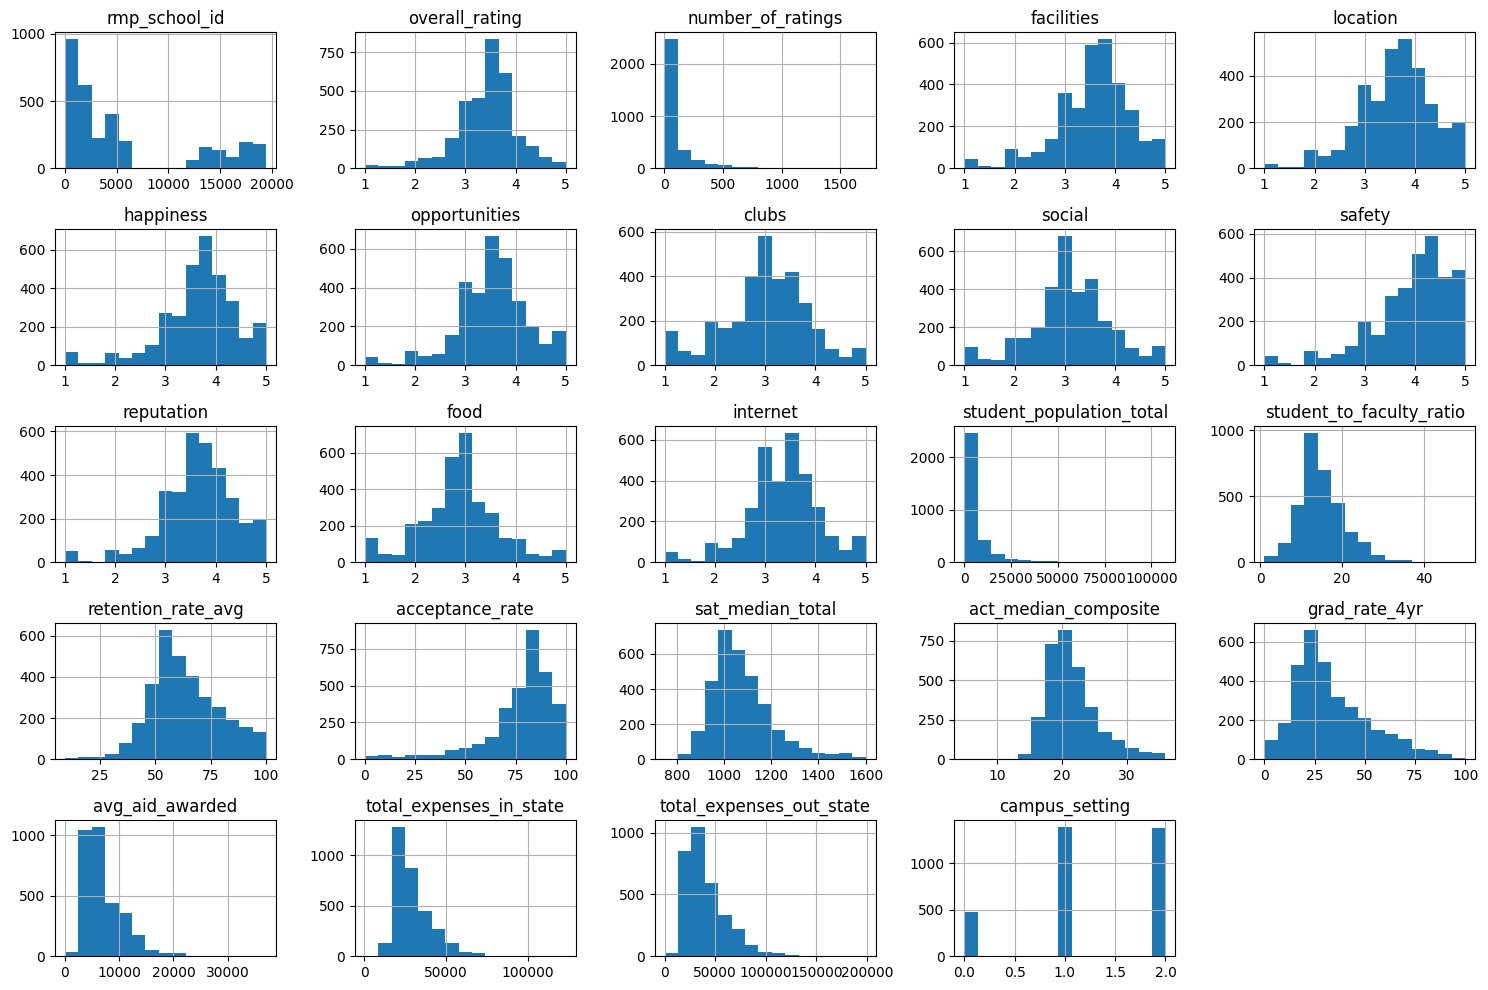

In [30]:
# df_final histograms of numeric cols
import matplotlib.pyplot as plt

numeric_cols = df_final.select_dtypes(include=['number']).columns

df_final[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [31]:
# round rates columns to 0 decimal places and ratings columns to 1 decimal place and the rest to 2 decimal places
rates_cols = ['retention_rate_avg', 'acceptance_rate', 'grad_rate_4yr']
ratings_cols = ['overall_rating', 'facilities', 'location', 'happiness', 'opportunities', 'clubs', 'social', 'safety', 'reputation', 'food', 'internet']
for col in df_final.columns:
    if col in rates_cols:
        df_final[col] = df_final[col].round(0).astype('Int64')
    elif col in ratings_cols:
        df_final[col] = df_final[col].round(1)
    elif col in numeric_cols:
        df_final[col] = df_final[col].round(2)

In [32]:
# map all state abbreviations to full name using us module
import us
df_final['state'] = df_final['state'].apply(lambda x: us.states.lookup(x).name if pd.notnull(x) and us.states.lookup(x) else x)

In [33]:
# unique states in df_final
df_final['state'].unique()

array(['Mississippi', 'Colorado', 'California', 'Alabama', 'New York',
       'Georgia', 'Ohio', 'Pennsylvania', 'Texas', 'Alaska', 'Idaho',
       'Michigan', 'Connecticut', 'Wisconsin', 'South Carolina',
       'Massachusetts', 'Kentucky', 'Indiana', 'Washington',
       'New Hampshire', 'North Carolina', 'Arkansas', 'South Dakota',
       'Illinois', 'Virginia', 'Tennessee', 'Minnesota', 'Missouri',
       'Kansas', 'Maine', 'Nebraska', 'Vermont', 'Florida', 'Maryland',
       'Hawaii', 'Utah', 'Iowa', 'Rhode Island', 'New Jersey', 'Oklahoma',
       'Montana', 'Louisiana', 'West Virginia', 'New Mexico', 'Oregon',
       'Arizona', 'Delaware', 'North Dakota', 'Nevada', 'Wyoming', 'Guam',
       'Puerto Rico'], dtype=object)

In [34]:
# drop rows with Guam and Puerto Rico in state column
df_final = df_final[~df_final['state'].isin(['Guam', 'Puerto Rico'])]

In [35]:
# export df_final to final_school_data.csv
df_final.to_csv('final_school_data.csv', index=False)